In [141]:

import pandas as pd
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
nltk.download('wordnet')
import numpy as np
import math
import matplotlib.pyplot as plt

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [142]:
pathfire="/content/drive/My Drive/Project Fire/Kopie von disaster_tweets.csv"
df = pd.read_csv(pathfire)
df

# cleaning process

df.drop('id',inplace=True, axis = 1)
print("Unterschiedliche Keywords vor cleaning: ",df.keyword.nunique())
df_unique=pd.DataFrame(data=df.keyword.unique(),  columns=["col1"])
df_unique.dropna(inplace=True)

stemmer = PorterStemmer()
df_unique['keyword_stem']=df_unique['col1'].apply(lambda x: stemmer.stem(x))


print("Unterschiedliche Keywords nach stemming: ",df_unique.keyword_stem.nunique())
df_unique.keyword_stem.unique()


# manuelles vereinheitlichen
einheits_dict={'burning%20build':'fire',
               'buildings%20burn':'fire',
               'buildings%20on%20fir':'fire',
               'bloodi': 'blood',
               'bleed': 'blood',
               'bush%20fir':'fire',
               'dead':'death',
               'explod':'explos',
               'blown%20up':'explos',
               'bridge%20collaps':'damag',
               'demolish':'damag',
               'demolit':'damag',
               'injuri':'injur',
               'apocalyps':'catastroph',
               'armageddon':'catastroph',
               'arsonist':'arson',
               'mass%20murder':'mass%20murd',
               'panick':'panic',
               'disast':'catastroph',
               'armi':'militari',
               'earthquak':'catastroph',
               'hellfir':'fire',
               'tornado':'hurrican',
               'cyclon':'hurrican',
               'terrorist':'terror',
               'nuclear%20disast':'meltdown',
               'tsunami':'flood',
               'surviv': 'survivor',
               'traumatis':'trauma',
               'wild%20fir': 'wildfir',
               'twister':'hurrican',
               'typhoon':'hurrican',
               'suicide%20bomb':'bomb',
               'whirlwind':'hurrican',
               'blizzard':'hurican',
               'collid':'collis',
               'destruct':'destroy',
               'devast':'destroy',
               'mass%20murd':'massacr',
               'crash':'crush',
               'sunk':'sink',
               'lava':'volcano'
               }


df_unique['keywords_final']=df_unique['keyword_stem'].replace(einheits_dict)

print("Unterschiedliche Keywords nach stemming und manuellem einsortieren: ",df_unique.keywords_final.nunique())
df_unique.keywords_final.unique()


Unterschiedliche Keywords vor cleaning:  221
Unterschiedliche Keywords nach stemming:  166
Unterschiedliche Keywords nach stemming und manuellem einsortieren:  126


array(['ablaz', 'accid', 'aftershock', 'airplane%20accid', 'ambul',
       'annihil', 'catastroph', 'militari', 'arson', 'attack', 'avalanch',
       'battl', 'bioterror', 'blaze', 'blood', 'blew%20up', 'blight',
       'hurican', 'explos', 'body%20bag', 'bomb', 'damag', 'fire', 'burn',
       'casualti', 'chemical%20emerg', 'cliff%20fal', 'collaps', 'collis',
       'crush', 'curfew', 'hurrican', 'danger', 'death', 'debri', 'delug',
       'derail', 'desol', 'destroy', 'deton', 'displac', 'drought',
       'drown', 'dust%20storm', 'electrocut', 'emerg', 'emergency%20plan',
       'emergency%20servic', 'engulf', 'epicentr', 'evacu', 'eyewit',
       'famin', 'fatal', 'fear', 'fire%20truck', 'first%20respond',
       'flame', 'flatten', 'flood', 'forest%20fir', 'hail', 'hailstorm',
       'harm', 'hazard', 'heat%20wav', 'hijack', 'hostag', 'injur',
       'inund', 'landslid', 'volcano', 'lightn', 'loud%20bang', 'massacr',
       'mass%20murd', 'mayhem', 'meltdown', 'mudslid', 'natural%2

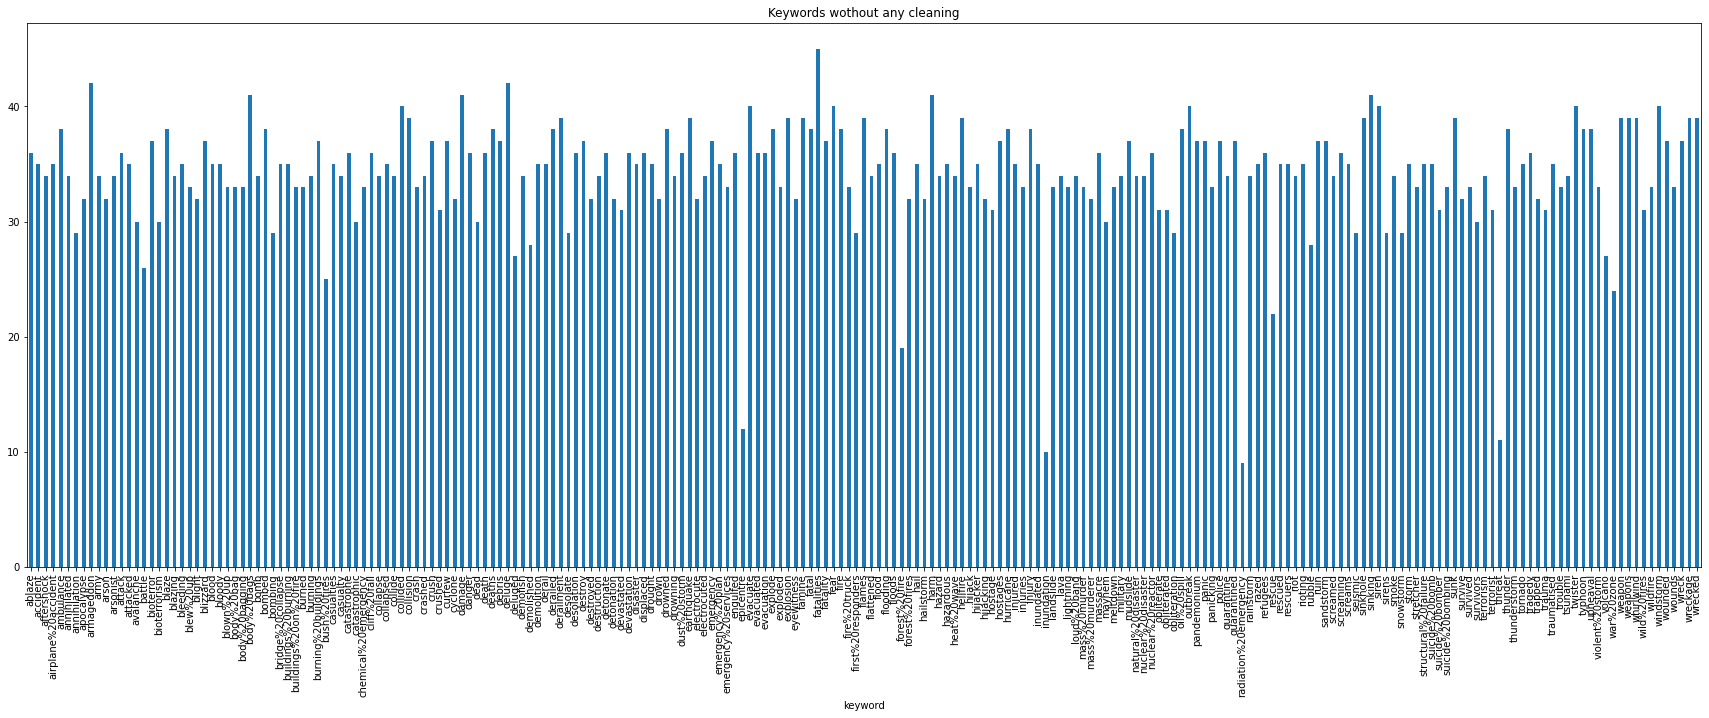

In [143]:


plt.figure(figsize=(30,10))
df.groupby('keyword')['keyword'].count().plot(kind='bar')
plt.title('Keywords wothout any cleaning')
plt.show()

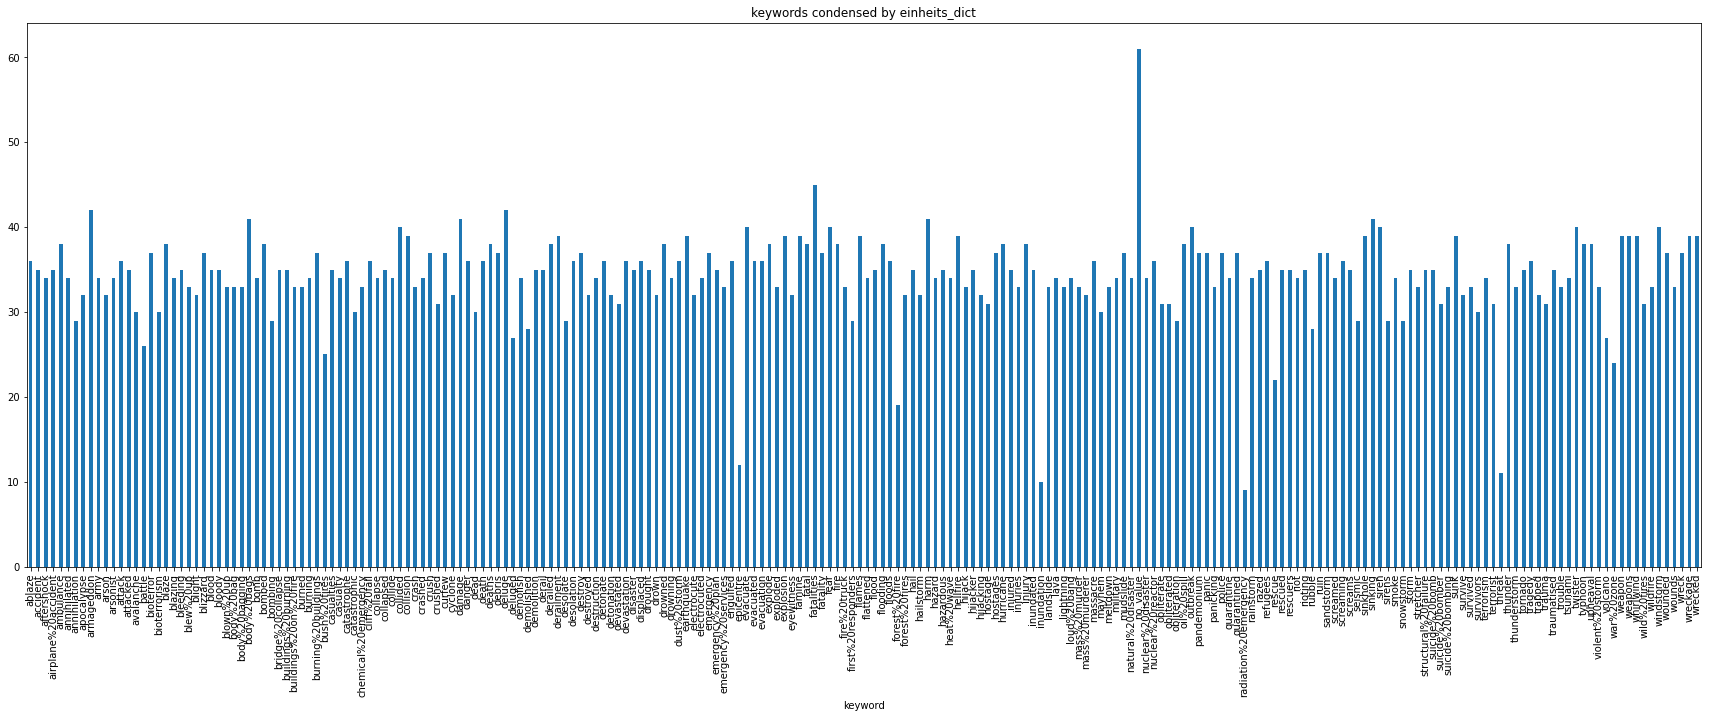

In [144]:
import numpy as np
import math
df.fillna('no_value',inplace=True)
df['keyword_stem']=df['keyword'].apply(lambda x: stemmer.stem(x))
df['keywords_final']=df['keyword_stem'].replace(einheits_dict)
plt.figure(figsize=(30,10))
df.groupby('keyword')['keyword'].count().plot(kind='bar')
plt.title("keywords condensed by einheits_dict")
plt.show()

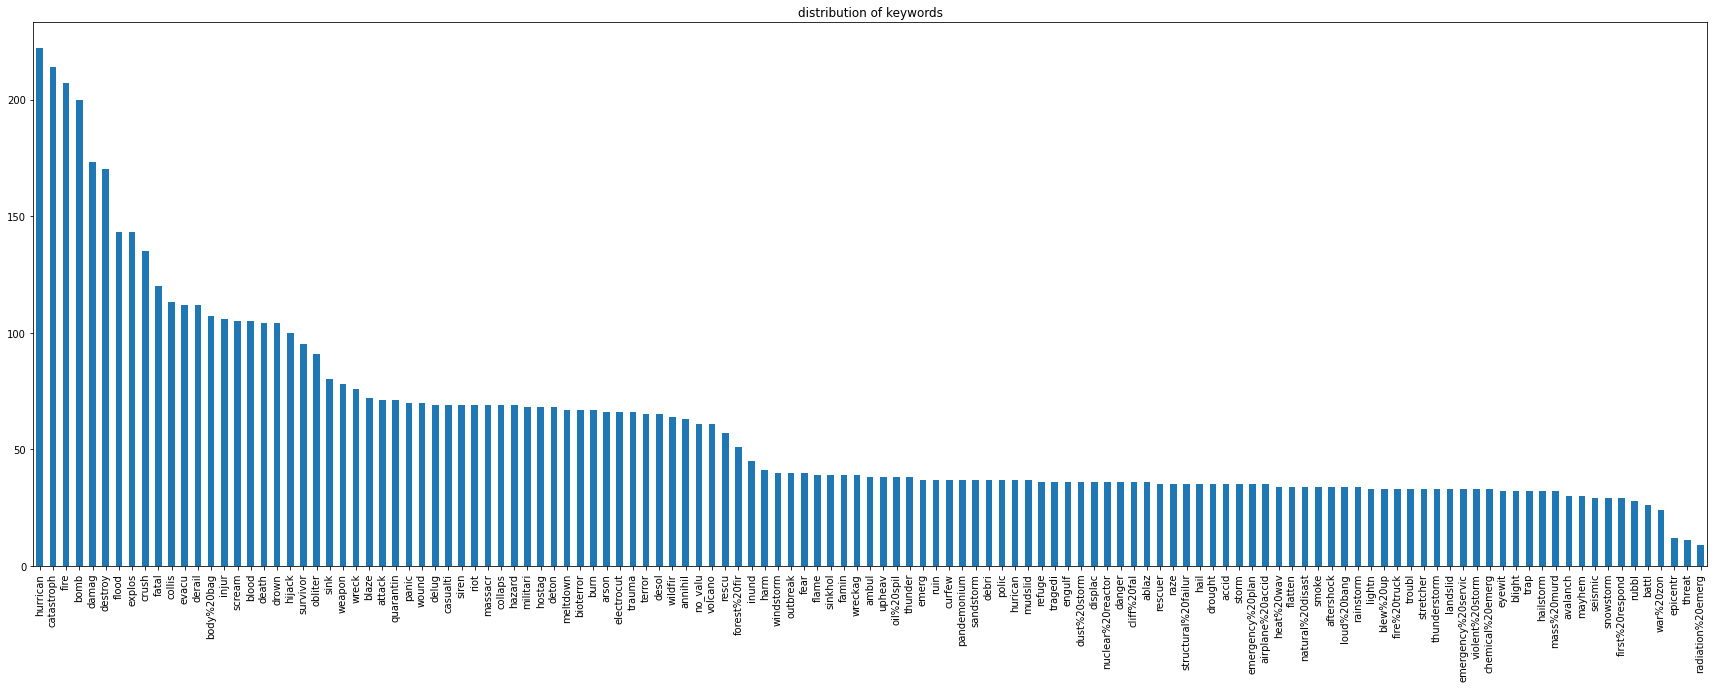

In [145]:
plt.figure(figsize=(30,10))
df['keywords_final'].value_counts().plot(kind='bar')

plt.title("distribution of keywords")
plt.show()

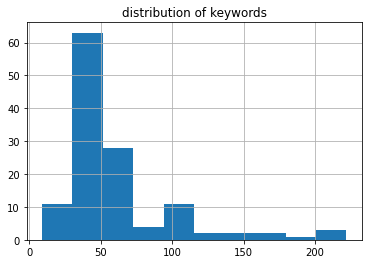

In [146]:
df['keywords_final'].value_counts().hist()
plt.title("distribution of keywords")
plt.show()

In [147]:
df.location.unique()

array(['no_value', 'Birmingham', 'Est. September 2012 - Bristol', ...,
       'Vancouver, Canada', 'London ', 'Lincoln'], dtype=object)

In [148]:
df.location.nunique()

3342

In [149]:
df['location'].value_counts()

no_value                    2533
USA                          104
New York                      71
United States                 50
London                        45
                            ... 
Jaipur, Rajasthan, India       1
Utica NY                       1
Your Conversation              1
too far                        1
global                         1
Name: location, Length: 3342, dtype: int64

In [150]:
# no action for location until requested


In [151]:
# text cleaning